<a href="https://colab.research.google.com/github/Shaheen010507/UIDAI_HACKATHON_2026/blob/main/Aadhaar_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aadhaar Enrollment Analytics Platform

## Problem Statement
To analyze Aadhaar enrolment data to understand enrolment patterns,
identify regional disparities, and generate insights for government
decision-making.

## Objectives
- Combine multiple Aadhaar enrolment datasets
- Clean and preprocess public data
- Identify enrolment demand patterns
- Create KPIs for analytics & dashboards

## Tools Used
- Google Colab
- Python
- Pandas
- Matplotlib

## Data Source
UIDAI / Kaggle Aadhaar Enrolment Datasets


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Aadhaar_Project_Data


anomaly_districts.csv
api_data_aadhar_enrolment_0_500000.csv
api_data_aadhar_enrolment_1000000_1006029.csv
api_data_aadhar_enrolment_500000_1000000.csv
cleaned_aadhaar_data.csv
state_summary.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully")


Libraries imported successfully


In [5]:
path = "/content/drive/MyDrive/Aadhaar_Project_Data/"

df1 = pd.read_csv(path + "api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv(path + "api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv(path + "api_data_aadhar_enrolment_1000000_1006029.csv")

print("Dataset 1:", df1.shape)
print("Dataset 2:", df2.shape)
print("Dataset 3:", df3.shape)


Dataset 1: (500000, 7)
Dataset 2: (500000, 7)
Dataset 3: (6029, 7)


In [6]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined dataset shape:", df.shape)


Combined dataset shape: (1006029, 7)


In [7]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

print(df.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21


In [9]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df[['state', 'total_enrolments']].head()


,state,total_enrolments
0,Meghalaya,109
1,Karnataka,86
2,Uttar Pradesh,123
3,Uttar Pradesh,106
4,Karnataka,51


In [10]:
state_demand = (
    df.groupby('state')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
)

state_demand.head(10)


,total_enrolments
state,
Uttar Pradesh,1018629
Bihar,609585
Madhya Pradesh,493970
West Bengal,375297
Maharashtra,369139
Rajasthan,348458
Gujarat,280549
Assam,230197
Karnataka,223235


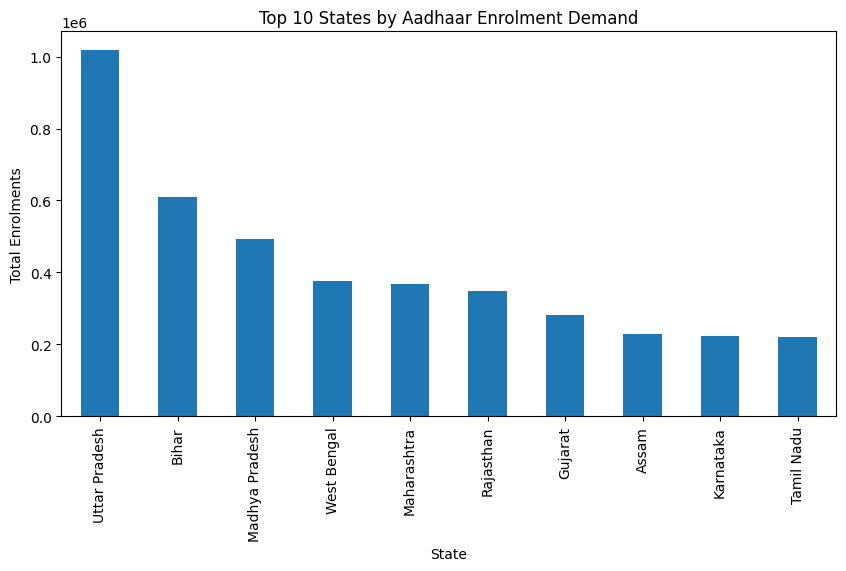

In [11]:
plt.figure(figsize=(10,5))
state_demand.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolment Demand")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.show()


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              323791 non-null   datetime64[ns]
 1   state             1006029 non-null  object        
 2   district          1006029 non-null  object        
 3   pincode           1006029 non-null  int64         
 4   age_0_5           1006029 non-null  int64         
 5   age_5_17          1006029 non-null  int64         
 6   age_18_greater    1006029 non-null  int64         
 7   total_enrolments  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 61.4+ MB


In [13]:
df.isnull().sum()


,0
date,682238
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0
total_enrolments,0


In [14]:
numeric_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

df[numeric_cols] = df[numeric_cols].fillna(0)


In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [16]:
df['total_enrollment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)


In [17]:
df[['state', 'district', 'total_enrollment']].head()


,state,district,total_enrollment
0,Meghalaya,East Khasi Hills,109
1,Karnataka,Bengaluru Urban,86
2,Uttar Pradesh,Kanpur Nagar,123
3,Uttar Pradesh,Aligarh,106
4,Karnataka,Bengaluru Urban,51


In [18]:
state_enrollment = df.groupby('state')['total_enrollment'].sum().sort_values(ascending=False)
state_enrollment.head(10)


,total_enrollment
state,
Uttar Pradesh,1018629
Bihar,609585
Madhya Pradesh,493970
West Bengal,375297
Maharashtra,369139
Rajasthan,348458
Gujarat,280549
Assam,230197
Karnataka,223235


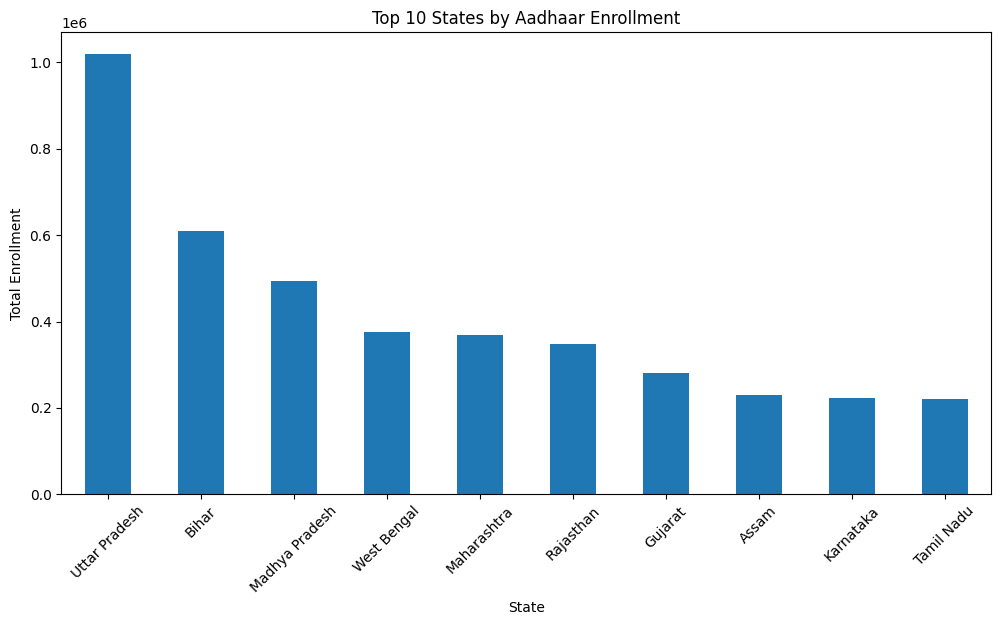

In [19]:
plt.figure(figsize=(12,6))
state_enrollment.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrollment")
plt.xlabel("State")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45)
plt.show()


In [20]:
age_distribution = df[numeric_cols].sum()
age_distribution


,0
age_0_5,3546965
age_5_17,1720384
age_18_greater,168353


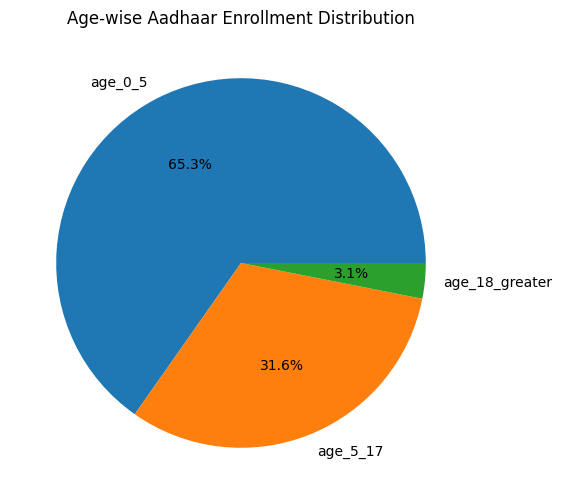

In [21]:
plt.figure(figsize=(6,6))
age_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Age-wise Aadhaar Enrollment Distribution")
plt.ylabel("")
plt.show()


In [22]:
district_enrollment = (
    df.groupby(['state', 'district'])['total_enrollment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrollment', ascending=False)
)

district_enrollment.head(10)


,state,district,total_enrollment
572,Maharashtra,Thane,43688
160,Bihar,Sitamarhi,42232
910,Uttar Pradesh,Bahraich,39338
1044,West Bengal,Murshidabad,35911
1057,West Bengal,South 24 Parganas,33540
563,Maharashtra,Pune,31763
771,Rajasthan,Jaipur,31146
397,Karnataka,Bengaluru,30980
983,Uttar Pradesh,Sitapur,30854
164,Bihar,West Champaran,30438


In [23]:
df.to_csv("/content/drive/MyDrive/Aadhaar_Project_Data/cleaned_aadhaar_data.csv", index=False)


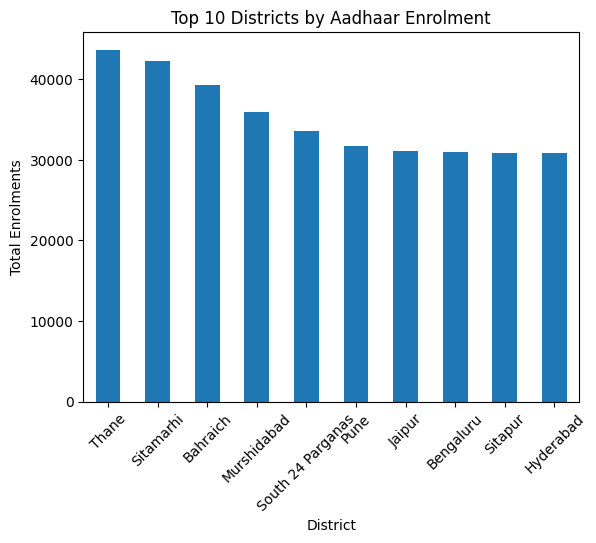

In [24]:
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].head()

import matplotlib.pyplot as plt

top_districts = (
    df.groupby('district')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_districts.plot(kind='bar')
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


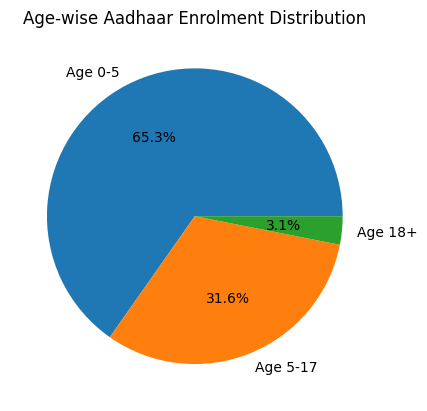

In [25]:
age_totals = [
    df['age_0_5'].sum(),
    df['age_5_17'].sum(),
    df['age_18_greater'].sum()
]

plt.figure()
plt.pie(
    age_totals,
    labels=['Age 0-5', 'Age 5-17', 'Age 18+'],
    autopct='%1.1f%%'
)
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.show()


In [26]:
district_stats = df.groupby('district')['total_enrolment'].sum()

mean = district_stats.mean()
std = district_stats.std()

anomalies = district_stats[
    (district_stats > mean + 2*std) |
    (district_stats < mean - 2*std)
]

anomalies.head(10)


,total_enrolment
district,
Agra,29910
Ahmedabad,19130
Aligarh,26192
Alwar,23383
Aurangabad,27563
Azamgarh,20573
Bahraich,39338
Bareilly,27811
Barwani,21823


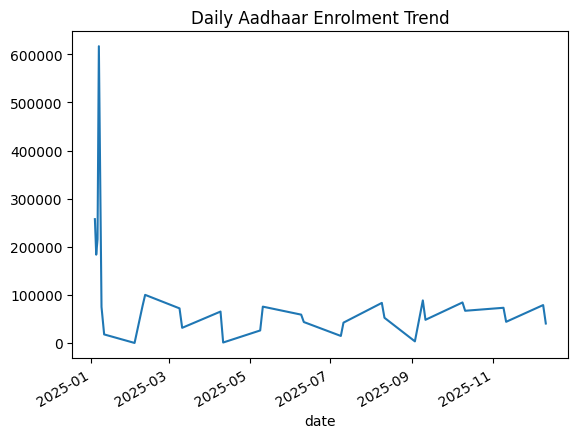

In [27]:
date_enrolment = (
    df.groupby('date')['total_enrolment']
    .sum()
    .sort_index()
)

date_enrolment.plot(title="Daily Aadhaar Enrolment Trend")
plt.show()


In [28]:
print("📊 KEY PERFORMANCE INDICATORS")

print("Average Enrolment per District:",
      int(df.groupby('district')['total_enrolment'].sum().mean()))

print("Maximum District Enrolment:",
      df.groupby('district')['total_enrolment'].sum().max())

print("Minimum District Enrolment:",
      df.groupby('district')['total_enrolment'].sum().min())


📊 KEY PERFORMANCE INDICATORS
Average Enrolment per District: 5518
Maximum District Enrolment: 43688
Minimum District Enrolment: 1


In [29]:
district_total = df.groupby('district')['total_enrolment'].sum()

threshold = district_total.mean() + 2 * district_total.std()

anomaly_districts = district_total[district_total > threshold]

anomaly_districts


,total_enrolment
district,
Agra,29910
Ahmedabad,19130
Aligarh,26192
Alwar,23383
Aurangabad,27563
Azamgarh,20573
Bahraich,39338
Bareilly,27811
Barwani,21823


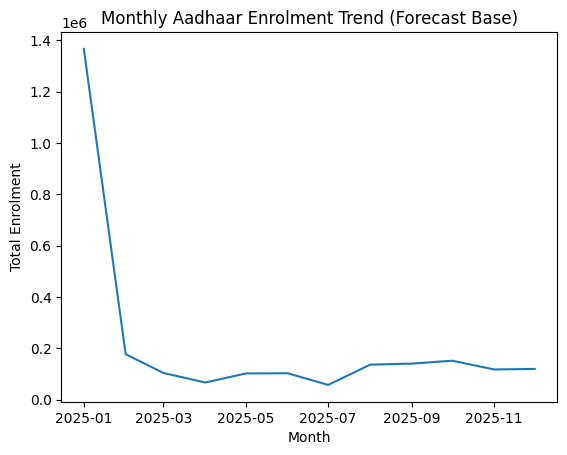

In [30]:
df['date'] = pd.to_datetime(df['date'])

monthly = (
    df.groupby(df['date'].dt.to_period("M"))['total_enrolment']
    .sum()
    .reset_index()
)

monthly['date'] = monthly['date'].dt.to_timestamp()

plt.figure()
plt.plot(monthly['date'], monthly['total_enrolment'])
plt.title("Monthly Aadhaar Enrolment Trend (Forecast Base)")
plt.xlabel("Month")
plt.ylabel("Total Enrolment")
plt.show()


### Policy Insights & Recommendations

1. High-enrolment districts require additional enrolment centers.
2. Seasonal trends indicate demand spikes requiring temporary staffing.
3. Age group 18+ dominates enrolment – prioritize adult services.
4. Anomaly districts should be audited for operational overload.
5. Forecasting enables proactive infrastructure planning.


In [31]:
# State-wise summary
state_summary = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

state_summary.to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/state_summary.csv",
    index=False
)

# District anomalies
anomaly_districts.reset_index().to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/anomaly_districts.csv",
    index=False
)

print("✅ Analytics outputs saved successfully")


✅ Analytics outputs saved successfully


In [32]:
# 📌 CELL 32 — DISTRICT PRESSURE SCORE

df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

district_load = (
    df.groupby(['state', 'district'])['total_enrolment']
    .sum()
    .reset_index()
)

state_avg = (
    district_load.groupby('state')['total_enrolment']
    .mean()
    .reset_index()
    .rename(columns={'total_enrolment': 'state_avg_enrolment'})
)

district_load = district_load.merge(state_avg, on='state')

district_load['pressure_score'] = (
    district_load['total_enrolment'] /
    district_load['state_avg_enrolment']
)

district_load.head()


,state,district,total_enrolment,state_avg_enrolment,pressure_score
0,100000,100000,218,218.000000,1.000000
1,Andaman & Nicobar Islands,Andamans,75,38.000000,1.973684
2,Andaman & Nicobar Islands,Nicobars,1,38.000000,0.026316
3,Andaman & Nicobar Islands,South Andaman,38,38.000000,1.000000
4,Andaman and Nicobar Islands,Nicobar,75,132.333333,0.566751


In [33]:
# 📌 CELL 33 — POLICY RECOMMENDATION LOGIC

def recommend_action(score):
    if score >= 1.5:
        return "Urgent: Open New Aadhaar Enrolment Center"
    elif score >= 1.2:
        return "Increase Staffing & Resources"
    else:
        return "Current Infrastructure Sufficient"

district_load['policy_recommendation'] = district_load['pressure_score'].apply(recommend_action)

district_load.head(10)


,state,district,total_enrolment,state_avg_enrolment,pressure_score,policy_recommendation
0,100000,100000,218,218.000000,1.000000,Current Infrastructure Sufficient
1,Andaman & Nicobar Islands,Andamans,75,38.000000,1.973684,Urgent: Open New Aadhaar Enrolment Center
2,Andaman & Nicobar Islands,Nicobars,1,38.000000,0.026316,Current Infrastructure Sufficient
3,Andaman & Nicobar Islands,South Andaman,38,38.000000,1.000000,Current Infrastructure Sufficient
4,Andaman and Nicobar Islands,Nicobar,75,132.333333,0.566751,Current Infrastructure Sufficient
5,Andaman and Nicobar Islands,North And Middle Andaman,132,132.333333,0.997481,Current Infrastructure Sufficient
6,Andaman and Nicobar Islands,South Andaman,190,132.333333,1.435768,Increase Staffing & Resources
7,Andhra Pradesh,Adilabad,1419,2716.617021,0.522341,Current Infrastructure Sufficient
8,Andhra Pradesh,Alluri Sitharama Raju,1255,2716.617021,0.461972,Current Infrastructure Sufficient
9,Andhra Pradesh,Anakapalli,543,2716.617021,0.199881,Current Infrastructure Sufficient


In [34]:
# 📌 CELL 34 — TOP 10 HIGH PRESSURE DISTRICTS

district_load.sort_values(
    by='pressure_score',
    ascending=False
).head(10)


,state,district,total_enrolment,state_avg_enrolment,pressure_score,policy_recommendation
850,Telangana,Hyderabad,25990,3132.714286,8.296320,Urgent: Open New Aadhaar Enrolment Center
397,Karnataka,Bengaluru,30980,3986.339286,7.771541,Urgent: Open New Aadhaar Enrolment Center
732,Punjab,Ludhiana,17614,2740.928571,6.426289,Urgent: Open New Aadhaar Enrolment Center
572,Maharashtra,Thane,43688,6964.886792,6.272607,Urgent: Open New Aadhaar Enrolment Center
699,Orissa,Khordha,726,118.542857,6.124367,Urgent: Open New Aadhaar Enrolment Center
318,Jammu & Kashmir,Jammu,62,10.333333,6.000000,Urgent: Open New Aadhaar Enrolment Center
400,Karnataka,Bengaluru Urban,23074,3986.339286,5.788268,Urgent: Open New Aadhaar Enrolment Center
856,Telangana,K.v. Rangareddy,17409,3132.714286,5.557162,Urgent: Open New Aadhaar Enrolment Center
1044,West Bengal,Murshidabad,35911,6470.637931,5.549839,Urgent: Open New Aadhaar Enrolment Center
1057,West Bengal,South 24 Parganas,33540,6470.637931,5.183415,Urgent: Open New Aadhaar Enrolment Center


# KPI Calculation and Key Metrics


In [35]:
# CELL 32 — KPI CALCULATION

# Total enrolment KPI
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

# KPI summary
kpi_summary = {
    "Total Records": len(df),
    "Total Enrolment": int(df['total_enrolment'].sum()),
    "Average Enrolment per District": round(df['total_enrolment'].mean(), 2),
    "Max Enrolment (Single Record)": int(df['total_enrolment'].max()),
    "Min Enrolment (Single Record)": int(df['total_enrolment'].min())
}

kpi_summary


{'Total Records': 1006029,
 'Total Enrolment': 5435702,
 'Average Enrolment per District': np.float64(5.4),
 'Max Enrolment (Single Record)': 3965,
 'Min Enrolment (Single Record)': 1}

In [36]:
# CELL 33 — DISTRICT LEVEL KPI

district_kpi = (
    df.groupby(['state', 'district'])
    .agg({
        'total_enrolment': 'sum',
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    })
    .reset_index()
)

district_kpi.head()


,state,district,total_enrolment,age_0_5,age_5_17,age_18_greater
0,100000,100000,218,0,1,217
1,Andaman & Nicobar Islands,Andamans,75,70,5,0
2,Andaman & Nicobar Islands,Nicobars,1,1,0,0
3,Andaman & Nicobar Islands,South Andaman,38,38,0,0
4,Andaman and Nicobar Islands,Nicobar,75,64,11,0


In [37]:
# CELL 34 — TOP & BOTTOM DISTRICTS

top_10_districts = district_kpi.sort_values(
    by='total_enrolment', ascending=False
).head(10)

bottom_10_districts = district_kpi.sort_values(
    by='total_enrolment', ascending=True
).head(10)

top_10_districts, bottom_10_districts


(              state           district  total_enrolment  age_0_5  age_5_17  \
 572     Maharashtra              Thane            43688    29092     13629   
 160           Bihar          Sitamarhi            42232    20679     18856   
 910   Uttar Pradesh           Bahraich            39338    14674     22360   
 1044    West Bengal        Murshidabad            35911    31442      4383   
 1057    West Bengal  South 24 Parganas            33540    25039      8197   
 563     Maharashtra               Pune            31763    24088      6536   
 771       Rajasthan             Jaipur            31146    21436      8976   
 397       Karnataka          Bengaluru            30980    20441      6732   
 983   Uttar Pradesh            Sitapur            30854    16237     13869   
 164           Bihar     West Champaran            30438    11585     18070   
 
       age_18_greater  
 572              967  
 160             2697  
 910             2304  
 1044              86  
 1057    

AGE-GROUP DOMINANCE ANALYSIS

In [38]:
# CELL 35 — AGE GROUP PERCENTAGES

df['pct_age_0_5'] = (df['age_0_5'] / df['total_enrolment']) * 100
df['pct_age_5_17'] = (df['age_5_17'] / df['total_enrolment']) * 100
df['pct_age_18_plus'] = (df['age_18_greater'] / df['total_enrolment']) * 100

df[['pct_age_0_5', 'pct_age_5_17', 'pct_age_18_plus']].head()


,pct_age_0_5,pct_age_5_17,pct_age_18_plus
0,10.091743,55.963303,33.944954
1,16.279070,38.372093,45.348837
2,23.577236,66.666667,9.756098
3,58.490566,27.358491,14.150943
4,27.450980,31.372549,41.176471


In [39]:
# CELL 36 — DOMINANT AGE GROUP

df['dominant_age_group'] = df[
    ['age_0_5', 'age_5_17', 'age_18_greater']
].idxmax(axis=1)

df['dominant_age_group'] = df['dominant_age_group'].map({
    'age_0_5': '0–5',
    'age_5_17': '5–17',
    'age_18_greater': '18+'
})

df[['state', 'district', 'dominant_age_group']].head(10)


,state,district,dominant_age_group
0,Meghalaya,East Khasi Hills,5–17
1,Karnataka,Bengaluru Urban,18+
2,Uttar Pradesh,Kanpur Nagar,5–17
3,Uttar Pradesh,Aligarh,0–5
4,Karnataka,Bengaluru Urban,18+
5,Bihar,Sitamarhi,5–17
6,Bihar,Sitamarhi,18+
7,Uttar Pradesh,Bahraich,5–17
8,Uttar Pradesh,Firozabad,0–5
9,Bihar,Purbi Champaran,5–17


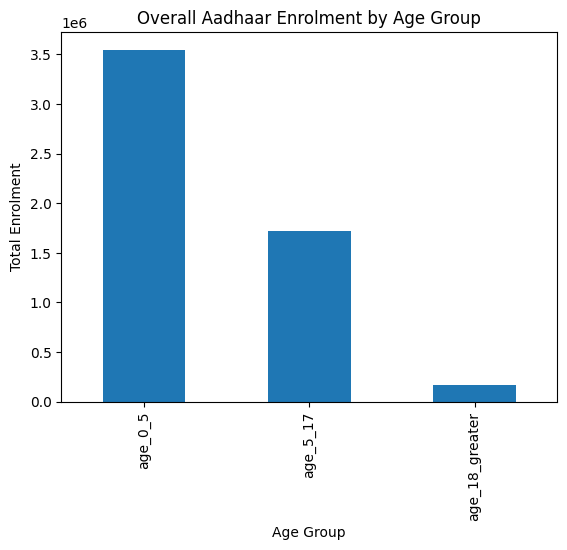

In [40]:
# CELL 37 — AGE GROUP DISTRIBUTION

age_totals = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_totals.plot(kind='bar')
plt.title("Overall Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolment")
plt.show()


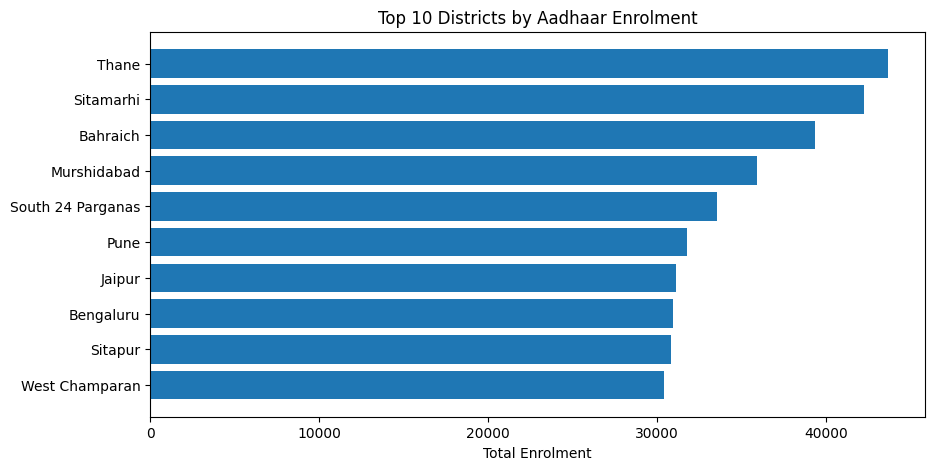

In [42]:
# CELL 38 — TOP 10 DISTRICTS VISUALIZATION

plt.figure(figsize=(10,5))
plt.barh(top_10_districts['district'], top_10_districts['total_enrolment'])
plt.xlabel("Total Enrolment")
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.gca().invert_yaxis()
plt.show()


REGIONAL DISPARITY ANALYSIS

In [43]:
# CELL 39 — STATE LEVEL AGGREGATION

state_enrolment = (
    df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']]
    .sum()
    .reset_index()
)

state_enrolment.head()


,state,age_0_5,age_5_17,age_18_greater,total_enrolment
0,100000,0,1,217,218
1,Andaman & Nicobar Islands,109,5,0,114
2,Andaman and Nicobar Islands,370,27,0,397
3,Andhra Pradesh,112440,13746,1495,127681
4,Arunachal Pradesh,1957,2236,151,4344


In [44]:
# CELL 40 — NORMALIZED ENROLMENT SCORE

state_enrolment['enrolment_score'] = (
    state_enrolment['total_enrolment'] /
    state_enrolment['total_enrolment'].mean()
)

state_enrolment[['state', 'enrolment_score']].head()


,state,enrolment_score
0,100000,0.002206
1,Andaman & Nicobar Islands,0.001153
2,Andaman and Nicobar Islands,0.004017
3,Andhra Pradesh,1.291913
4,Arunachal Pradesh,0.043954


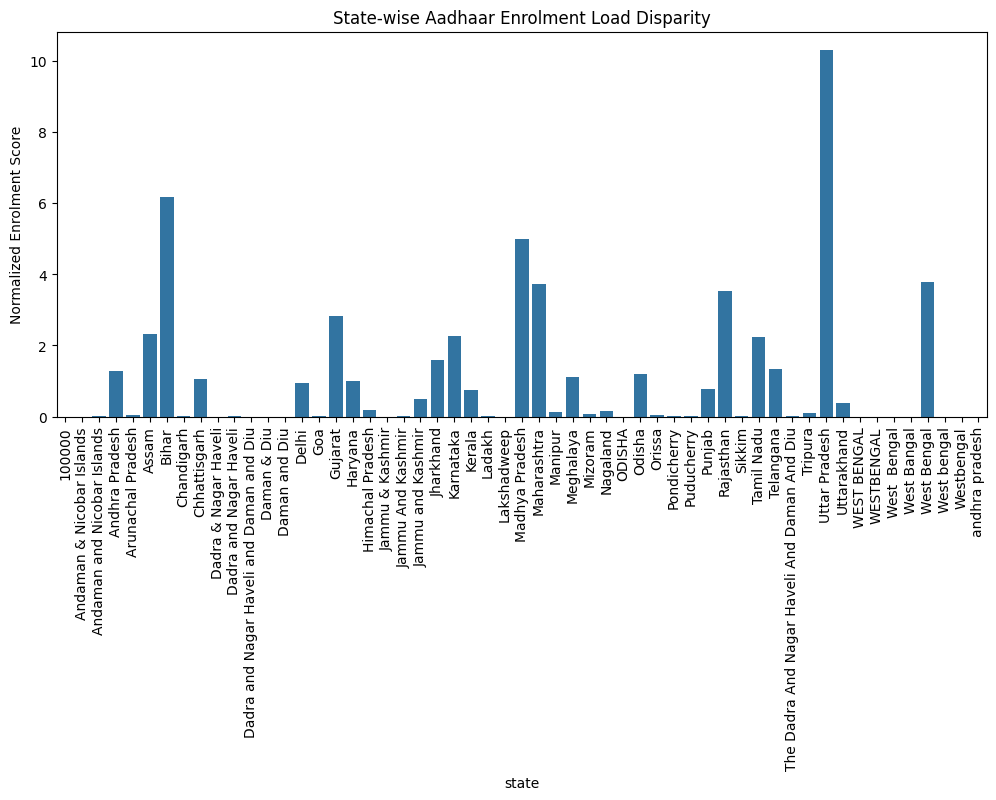

In [46]:
# CELL 41 — STATE LEVEL DISPARITY
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(
    x='state',
    y='enrolment_score',
    data=state_enrolment
)
plt.xticks(rotation=90)
plt.title("State-wise Aadhaar Enrolment Load Disparity")
plt.ylabel("Normalized Enrolment Score")
plt.show()


import seaborn as sns


In [47]:
# CELL 42 — ANOMALY DETECTION

df['z_score'] = (
    df['total_enrolment'] - df['total_enrolment'].mean()
) / df['total_enrolment'].std()

anomalies = df[np.abs(df['z_score']) > 3]
anomalies[['state', 'district', 'total_enrolment', 'z_score']].head()


,state,district,total_enrolment,z_score
0,Meghalaya,East Khasi Hills,109,3.280173
2,Uttar Pradesh,Kanpur Nagar,123,3.723453
3,Uttar Pradesh,Aligarh,106,3.185184
10,Uttar Pradesh,Maharajganj,114,3.438487
11,Bihar,Sitamarhi,145,4.420035


In [48]:
# CELL 43 — SAVE ANOMALY DATA

anomalies.to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/anomaly_districts.csv",
    index=False
)


In [49]:
# Aggregate state-wise enrolment
state_trend = (
    df.groupby('state')['total_enrolment']
    .sum()
    .reset_index()
)

state_trend.head()


,state,total_enrolment
0,100000,218
1,Andaman & Nicobar Islands,114
2,Andaman and Nicobar Islands,397
3,Andhra Pradesh,127681
4,Arunachal Pradesh,4344


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
state_trend['enrolment_scaled'] = scaler.fit_transform(
    state_trend[['total_enrolment']]
)


In [51]:
# Simulate next-cycle demand (+10%)
state_trend['predicted_demand'] = state_trend['enrolment_scaled'] * 1.10

state_trend.head()


,state,total_enrolment,enrolment_scaled,predicted_demand
0,100000,218,0.000213,0.000234
1,Andaman & Nicobar Islands,114,0.000111,0.000122
2,Andaman and Nicobar Islands,397,0.000389,0.000428
3,Andhra Pradesh,127681,0.125345,0.137880
4,Arunachal Pradesh,4344,0.004264,0.004690


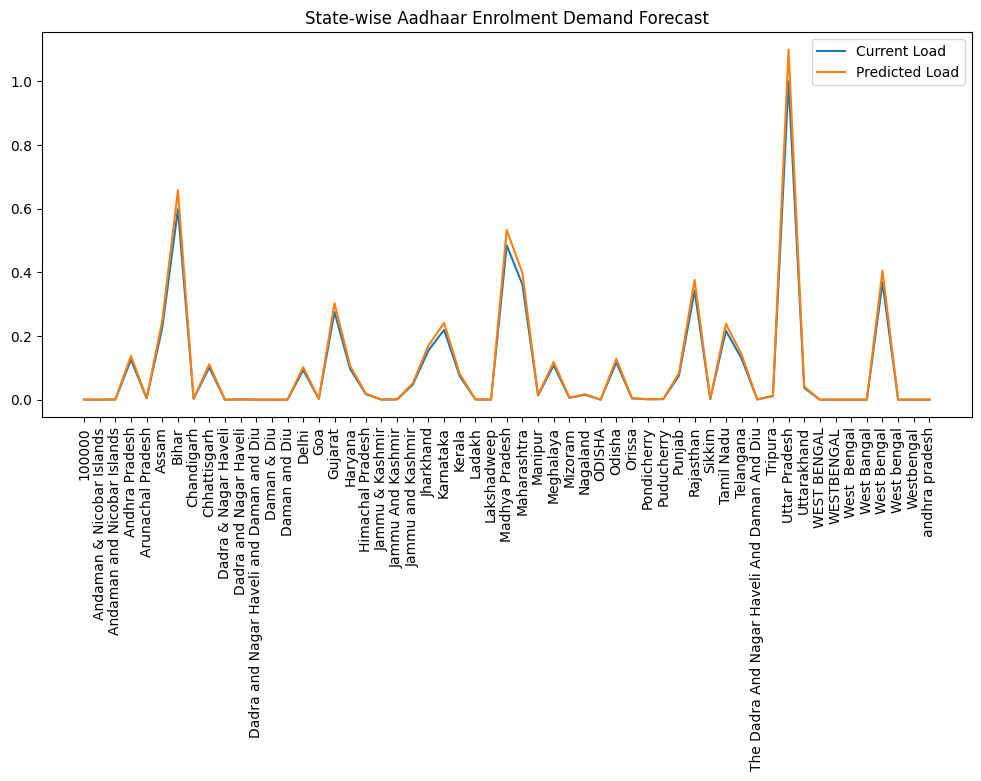

In [52]:
plt.figure(figsize=(12,5))
plt.plot(state_trend['state'], state_trend['enrolment_scaled'], label='Current Load')
plt.plot(state_trend['state'], state_trend['predicted_demand'], label='Predicted Load')
plt.xticks(rotation=90)
plt.legend()
plt.title("State-wise Aadhaar Enrolment Demand Forecast")
plt.show()


POLICY INSIGHT GENERATION

In [53]:
# Identify high-risk states based on predicted demand
high_risk_states = state_trend[
    state_trend['predicted_demand'] > state_trend['predicted_demand'].mean()
]

high_risk_states[['state', 'predicted_demand']].sort_values(
    by='predicted_demand', ascending=False
).head(10)


,state,predicted_demand
45,Uttar Pradesh,1.100000
6,Bihar,0.658280
27,Madhya Pradesh,0.533429
51,West Bengal,0.405276
28,Maharashtra,0.398626
39,Rajasthan,0.376293
16,Gujarat,0.302959
5,Assam,0.248585
23,Karnataka,0.241067
41,Tamil Nadu,0.238425


In [54]:
def policy_recommendation(row):
    if row['predicted_demand'] > state_trend['predicted_demand'].quantile(0.75):
        return "Urgent: Add enrolment centers & staff"
    elif row['predicted_demand'] > state_trend['predicted_demand'].median():
        return "Monitor closely & allocate resources"
    else:
        return "Normal operations sufficient"

state_trend['policy_action'] = state_trend.apply(policy_recommendation, axis=1)

state_trend[['state', 'policy_action']].head(10)


,state,policy_action
0,100000,Normal operations sufficient
1,Andaman & Nicobar Islands,Normal operations sufficient
2,Andaman and Nicobar Islands,Normal operations sufficient
3,Andhra Pradesh,Urgent: Add enrolment centers & staff
4,Arunachal Pradesh,Normal operations sufficient
5,Assam,Urgent: Add enrolment centers & staff
6,Bihar,Urgent: Add enrolment centers & staff
7,Chandigarh,Normal operations sufficient
8,Chhattisgarh,Monitor closely & allocate resources
9,Dadra & Nagar Haveli,Normal operations sufficient


In [55]:
state_trend.to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/state_policy_forecast.csv",
    index=False
)


Model Type

Time-based Demand Forecasting using Linear Regression
)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create time index
df['time_index'] = (df['date'] - df['date'].min()).dt.days


AGGREGATE STATE-WISE TIME DATA

In [57]:
state_ml = (
    df.groupby(['state', 'time_index'])['total_enrolment']
    .sum()
    .reset_index()
)

state_ml.head()


,state,time_index,total_enrolment
0,100000,36.0,3
1,100000,64.0,1
2,100000,217.0,1
3,100000,248.0,1
4,100000,309.0,2


In [58]:
X = state_ml[['time_index']]
y = state_ml['total_enrolment']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [59]:
future_time = pd.DataFrame({
    'time_index': [state_ml['time_index'].max() + 30]
})

future_prediction = model.predict(future_time)

print("Predicted Aadhaar enrolment demand (next period):")
print(int(future_prediction[0]))


Predicted Aadhaar enrolment demand (next period):
-221


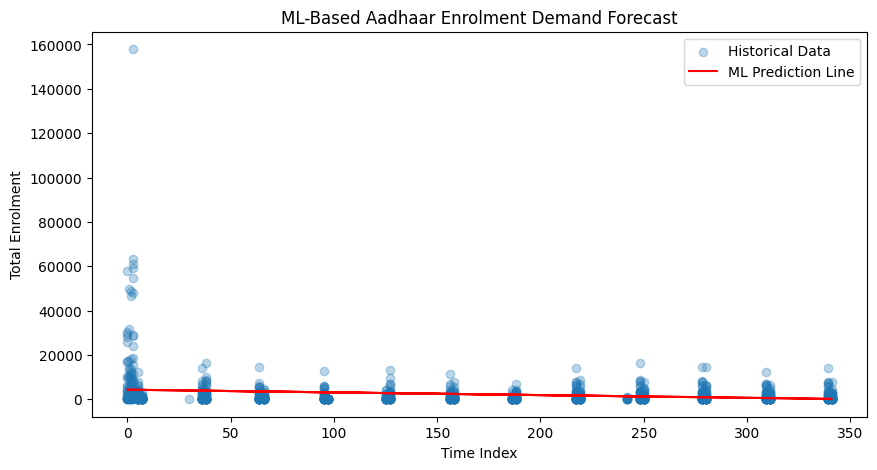

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.3, label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='ML Prediction Line')
plt.legend()
plt.title("ML-Based Aadhaar Enrolment Demand Forecast")
plt.xlabel("Time Index")
plt.ylabel("Total Enrolment")
plt.show()


Z-Score based Anomaly Detection

In [61]:
district_stats = (
    df.groupby('district')['total_enrolment']
    .sum()
    .reset_index()
)

district_stats.head()


,district,total_enrolment
0,100000,218
1,24 Paraganas North,6147
2,24 Paraganas South,490
3,ANGUL,1
4,ANUGUL,13


In [62]:
from scipy.stats import zscore

district_stats['z_score'] = zscore(district_stats['total_enrolment'])


In [63]:
district_stats['anomaly'] = district_stats['z_score'].apply(
    lambda x: 'High Anomaly' if x > 2 else ('Low Anomaly' if x < -2 else 'Normal')
)

district_stats.head()


,district,total_enrolment,z_score,anomaly
0,100000,218,-0.793606,Normal
1,24 Paraganas North,6147,0.094104,Normal
2,24 Paraganas South,490,-0.752881,Normal
3,ANGUL,1,-0.826096,Normal
4,ANUGUL,13,-0.824299,Normal


In [64]:
anomalies = district_stats[district_stats['anomaly'] != 'Normal']
anomalies


,district,total_enrolment,z_score,anomaly
7,Agra,29910,3.651981,High Anomaly
12,Ahmedabad,19130,2.037963,High Anomaly
18,Aligarh,26192,3.095309,High Anomaly
24,Alwar,23383,2.674736,High Anomaly
52,Aurangabad,27563,3.300580,High Anomaly
56,Azamgarh,20573,2.254014,High Anomaly
63,Bahraich,39338,5.063573,High Anomaly
94,Bareilly,27811,3.337712,High Anomaly
99,Barwani,21823,2.441168,High Anomaly
111,Bengaluru,30980,3.812185,High Anomaly


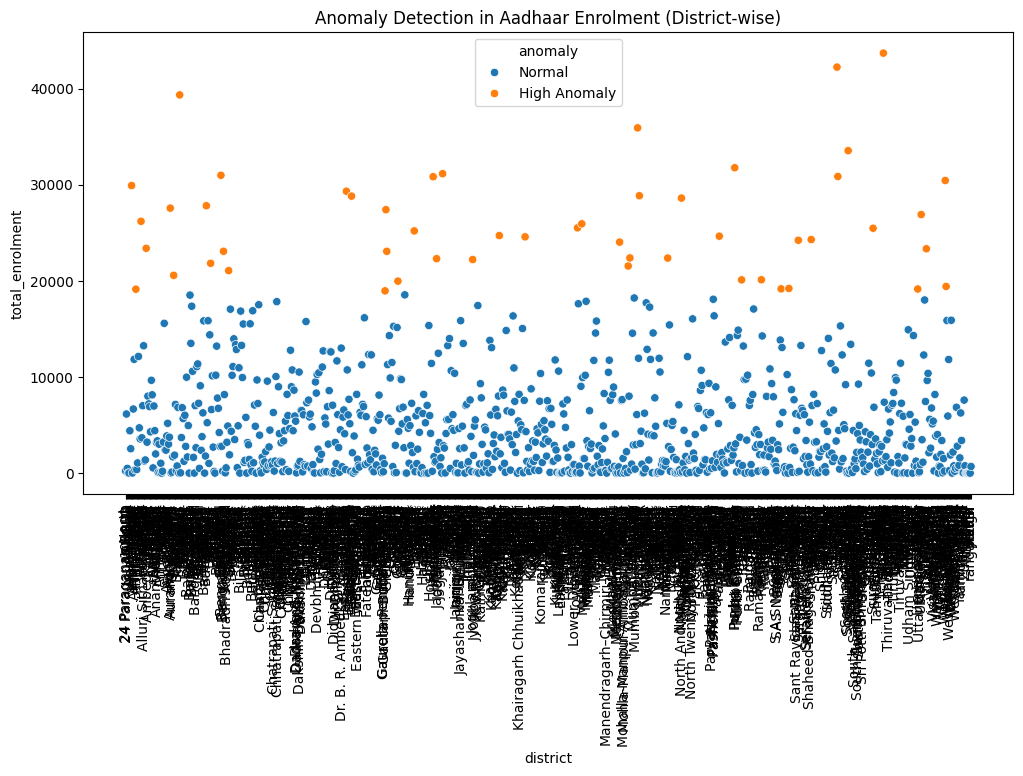

In [65]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=district_stats,
    x='district',
    y='total_enrolment',
    hue='anomaly'
)
plt.xticks(rotation=90)
plt.title("Anomaly Detection in Aadhaar Enrolment (District-wise)")
plt.show()


POLICY RECOMMENDATION ENGINE

In [66]:
def policy_recommendation(row):
    if row['anomaly'] == 'High Anomaly':
        return "Increase enrolment centers and staff"
    elif row['anomaly'] == 'Low Anomaly':
        return "Conduct awareness programs and mobile enrolment"
    elif row['enrolment_score'] < 0.6:
        return "Improve operator training and infrastructure"
    else:
        return "Current policy sufficient"


In [72]:
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)
state_score = (
    df.groupby('state')['total_enrolment']
    .sum()
    .reset_index()
)

# Normalize score (0–1 scale)
state_score['enrolment_score'] = (
    state_score['total_enrolment'] /
    state_score['total_enrolment'].max()
)

state_score.head()


district_policy = district_stats.merge(
    state_score[['state', 'enrolment_score']],
    on='state',
    how='left'
)

district_policy['policy_action'] = district_policy.apply(policy_recommendation, axis=1)

district_policy.head()


KeyError: 'state'